## (1) 收集數據：提供文本文件

- 使用pandas 讀取 CSV 檔案

## (2) 準備數據：使用 Python 解析文本


從訓練資料中找出最近的K筆資料，然後看哪個類別的資料筆數最多

In [71]:
from numpy import *

import pandas as pd
import numpy as np
iris = pd.read_csv('data/iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [72]:
# type: pandas.core.frame.DataFrame / to numpy.ndarray
iris=iris.values  # dataframe 轉為 array
iris

array([[1, 5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [2, 4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [3, 4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4, 4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5, 5.0, 3.6, 1.4, 0.2, 'Iris-setosa'],
       [6, 5.4, 3.9, 1.7, 0.4, 'Iris-setosa'],
       [7, 4.6, 3.4, 1.4, 0.3, 'Iris-setosa'],
       [8, 5.0, 3.4, 1.5, 0.2, 'Iris-setosa'],
       [9, 4.4, 2.9, 1.4, 0.2, 'Iris-setosa'],
       [10, 4.9, 3.1, 1.5, 0.1, 'Iris-setosa'],
       [11, 5.4, 3.7, 1.5, 0.2, 'Iris-setosa'],
       [12, 4.8, 3.4, 1.6, 0.2, 'Iris-setosa'],
       [13, 4.8, 3.0, 1.4, 0.1, 'Iris-setosa'],
       [14, 4.3, 3.0, 1.1, 0.1, 'Iris-setosa'],
       [15, 5.8, 4.0, 1.2, 0.2, 'Iris-setosa'],
       [16, 5.7, 4.4, 1.5, 0.4, 'Iris-setosa'],
       [17, 5.4, 3.9, 1.3, 0.4, 'Iris-setosa'],
       [18, 5.1, 3.5, 1.4, 0.3, 'Iris-setosa'],
       [19, 5.7, 3.8, 1.7, 0.3, 'Iris-setosa'],
       [20, 5.1, 3.8, 1.5, 0.3, 'Iris-setosa'],
       [21, 5.4, 3.4, 1.7, 0.2, 'Iris-setosa'],
 

## (3)分析數據: 歸一化Normalization
(將訓練集中數值特徵縮放到0和1之間)

### Min-max feature scaling

![Image](https://wikimedia.org/api/rest_v1/media/math/render/svg/0222c9472478eec2857b8bcbfa4148ece4a11b84)

In [73]:
#歸一化公式
def autoNorm(dataSet):   # = 數據集
    minVals = dataSet.min(0)  
    maxVals = dataSet.max(0)  
    ranges = maxVals - minVals 
    ## formula
    m = dataSet.shape[0]
    normDataSet = zeros(shape(dataSet))
    normDataSet = (dataSet - tile(minVals, (m,1)))/ (tile(ranges, (m,1)))      #在列方向上重复 array 1000次，行1次
    return normDataSet, ranges, minVals  #歸一化後數據集, 最小值, 範圍

In [74]:
normMat, ranges, minVals = autoNorm(iris[:,1:5])
print("原數據\n",iris[:,1:5])
print("歸一化\n",normMat)

原數據
 [[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3

## (4) 訓練算法：不適用於 KNN 

因為測試數據每一次都要與全量的訓練數據進行比較，所以這個過程是沒有必要的。

## (5) 測試算法：

In [68]:
#KNN : k-Nearest Neighbors algorithm
def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX, (dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort()     
    classCount={}          
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
    sortedClassCount = sorted(iter(classCount.items()), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]



In [69]:
def datingClassTest():
    datingDataMat = iris
    normMat, ranges, minVals = autoNorm(iris[:,1:5])   
    m = normMat.shape[0]
    # 測試樣本數， numTestVecs
    hoRatio = 0.50      #測試範圍比例 (50%) 設定 / 訓練集為 1-x
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],                      #KNN
                                     normMat[numTestVecs:m,:],
                                     datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" 
              % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): 
            errorCount += 1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print(errorCount)   #測試數

In [70]:
datingClassTest()  # 12 需要 input labels

NameError: name 'datingLabels' is not defined

In [3]:
# 找出與test最近的資料點  when k =1==
test = [5.0, 3.6, 1.4, 0.2]
s1 = (iris['SepalLengthCm'] - test[0])**2
s2 = (iris['SepalWidthCm'] - test[1])**2
s3 = (iris['PetalLengthCm'] - test[2])**2
s4 = (iris['PetalWidthCm'] - test[3])**2
d = (s1+s2+s3+s4)**0.5
iris.iloc[np.argmin(d)]

Id                         5
SepalLengthCm              5
SepalWidthCm             3.6
PetalLengthCm            1.4
PetalWidthCm             0.2
Species          Iris-setosa
Name: 4, dtype: object

In [8]:
# np.min(d)
np.argmin(d)

4

In [27]:
# 找出與test最近的K個資料點
K = 6
test = [5.0, 3.6, 1.4, 0.2]
s1 = (iris['SepalLengthCm'] - test[0])**2
s2 = (iris['SepalWidthCm'] - test[1])**2
s3 = (iris['PetalLengthCm'] - test[2])**2
s4 = (iris['PetalWidthCm'] - test[3])**2
d = (s1+s2+s3+s4)**0.5
iris.iloc[np.argsort(d)][0:K]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5,5.0,3.6,1.4,0.2,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa
17,18,5.1,3.5,1.4,0.3,Iris-setosa
40,41,5.0,3.5,1.3,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa


## KNN 視覺化

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [5]:
def knn_comparison(data, k):
 x = data[['X','Y']].values
 y = data['class'].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('Knn with K='+ str(k))
 plt.show()

### U Shaped

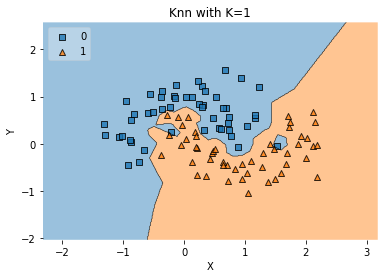

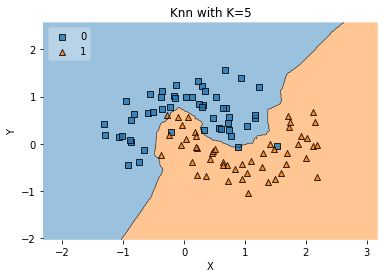

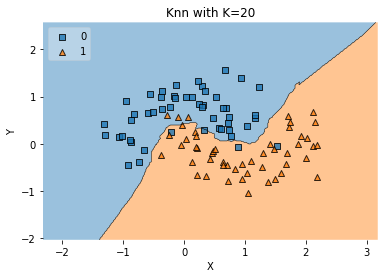

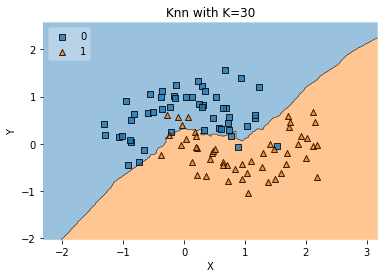

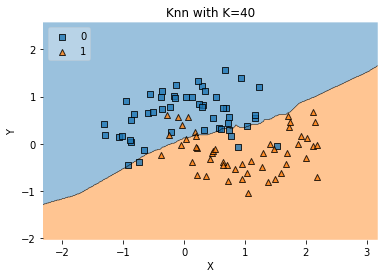

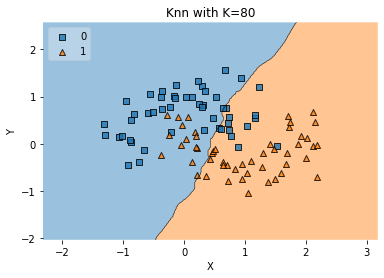

In [28]:
data = pd.read_csv('演算法測試資料/ushape.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

### 兩個類別資料互相被同心圓包圍 Two set concentric circles

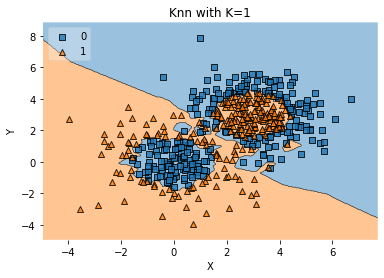

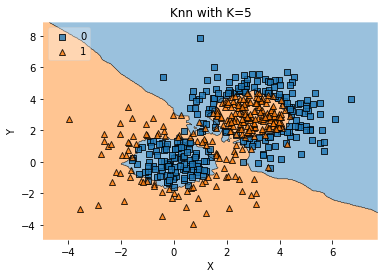

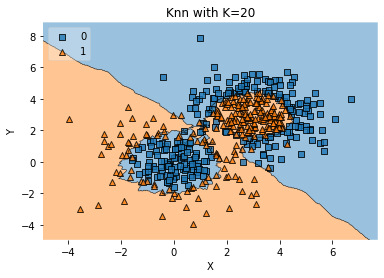

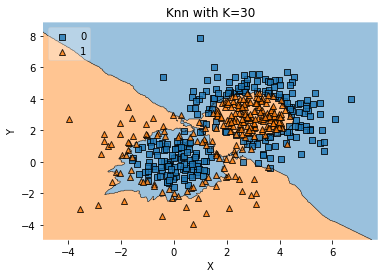

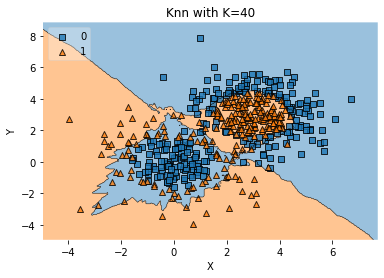

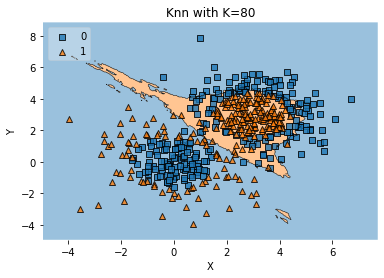

In [29]:
data = pd.read_csv('演算法測試資料/concertriccir2.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

### XOR

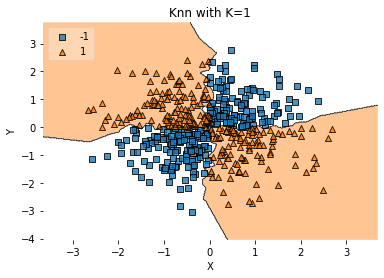

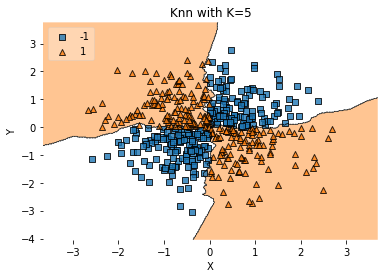

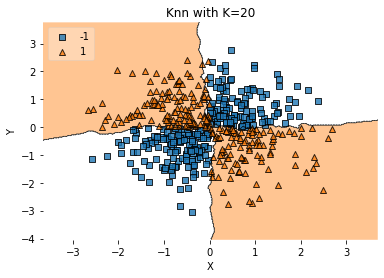

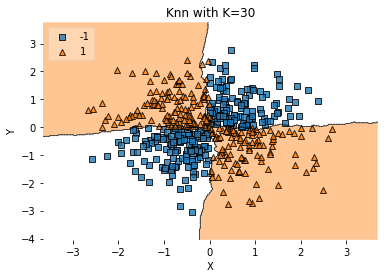

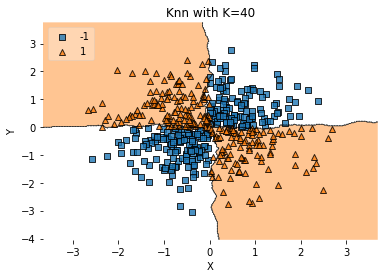

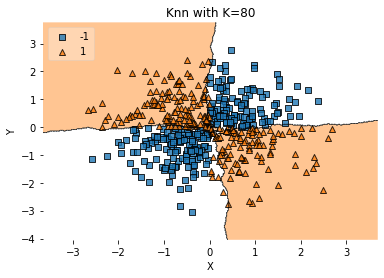

In [30]:
data = pd.read_csv('演算法測試資料/xor.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

### Linearly separable

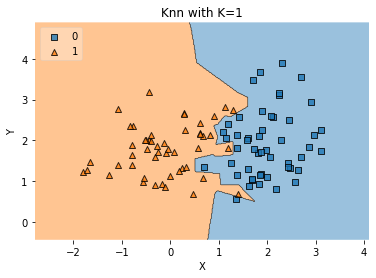

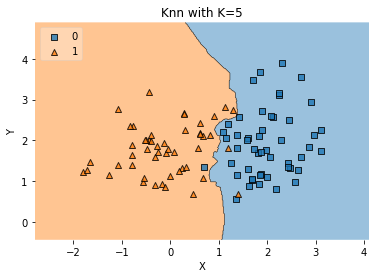

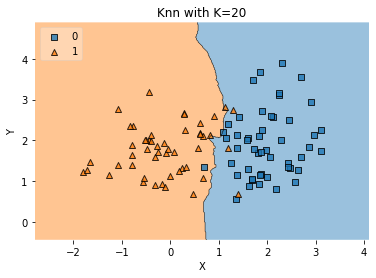

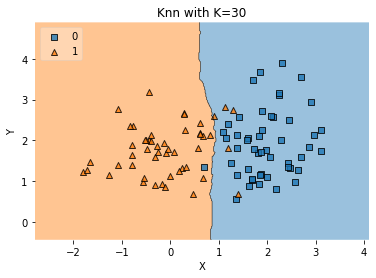

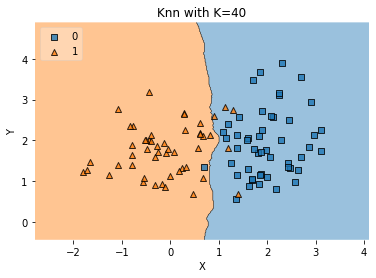

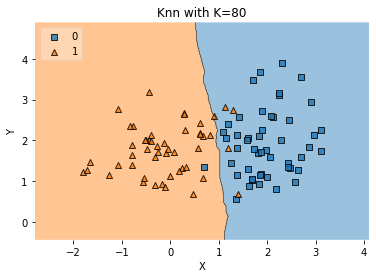

In [31]:
data = pd.read_csv('演算法測試資料/linearsep.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)

### Outliers 有離異群的資料

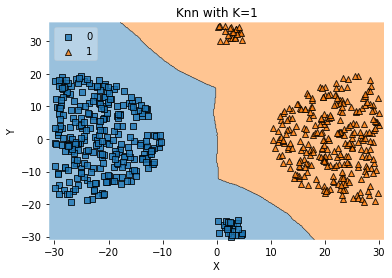

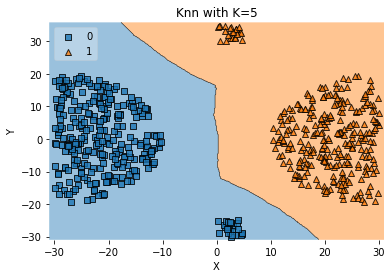

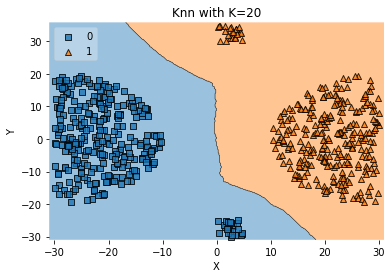

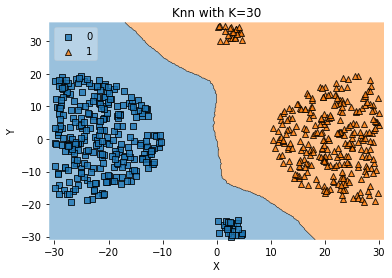

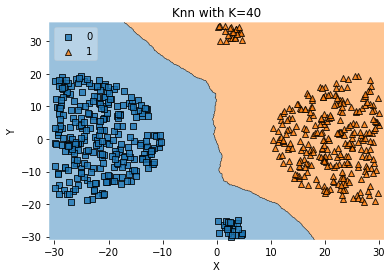

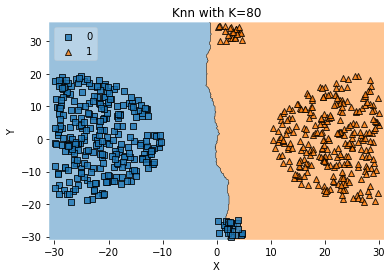

In [33]:
data = pd.read_csv('演算法測試資料/outlier.csv')
for i in [1,5,20,30,40,80]:
    knn_comparison(data, i)